# トポロジカル量子計算　表面符号実験

## importなど

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import random

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import BasicAer

## 最小構成の平面型表面符号

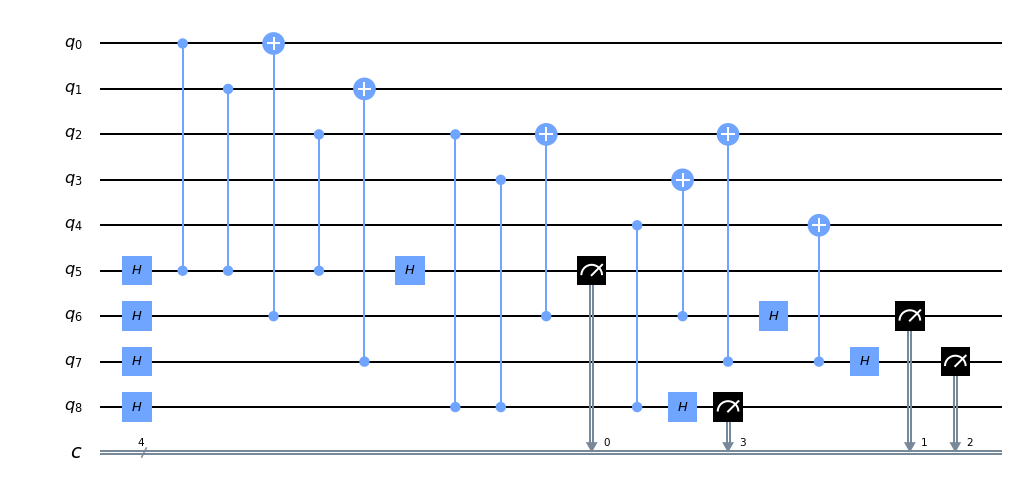

In [3]:
qc = QuantumCircuit(9,4)

# Z-type Stabilizers
qc.h(5)
qc.cz(5, 0)
qc.cz(5, 1)
qc.cz(5, 2)
qc.h(5)

qc.h(8)
qc.cz(8, 2)
qc.cz(8, 3)
qc.cz(8, 4)
qc.h(8)

# X-type Stabilizers
qc.h(6)
qc.cx(6, 0)
qc.cx(6, 2)
qc.cx(6, 3)
qc.h(6)

qc.h(7)
qc.cx(7, 1)
qc.cx(7, 2)
qc.cx(7, 4)
qc.h(7)

# Measurement
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)
qc.draw()

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'0010': 256, '0000': 266, '0100': 246, '0110': 232}

## 平面型表面符号: スタビライザー状態への初期化

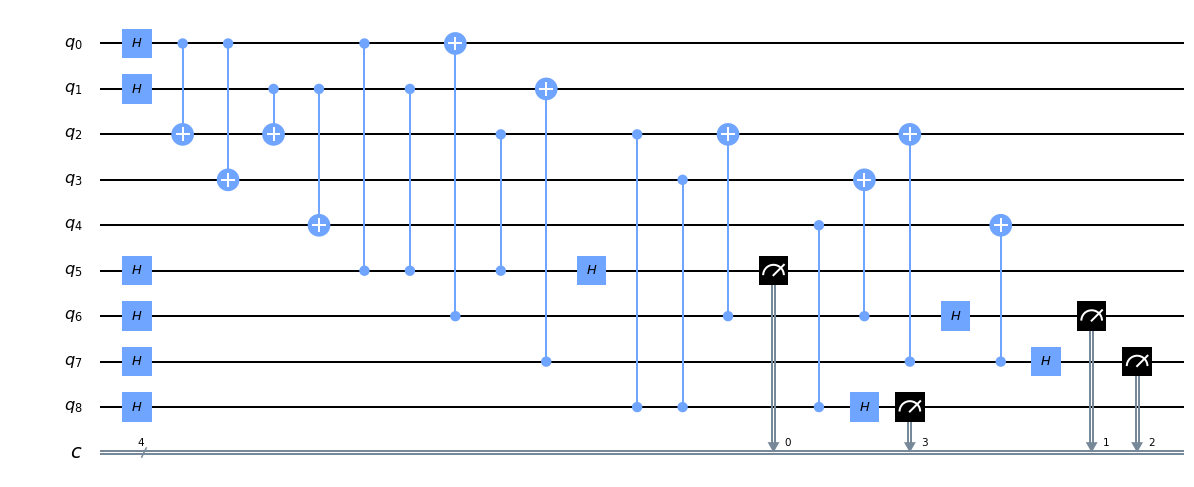

In [5]:
qc = QuantumCircuit(9,4)

# Make stabilizer state
qc.h(0)
qc.cx(0, 2)
qc.cx(0, 3)

qc.h(1)
qc.cx(1, 2)
qc.cx(1, 4)

# Z-type Stabilizers
qc.h(5)
qc.cz(5, 0)
qc.cz(5, 1)
qc.cz(5, 2)
qc.h(5)

qc.h(8)
qc.cz(8, 2)
qc.cz(8, 3)
qc.cz(8, 4)
qc.h(8)

# X-type Stabilizers
qc.h(6)
qc.cx(6, 0)
qc.cx(6, 2)
qc.cx(6, 3)
qc.h(6)

qc.h(7)
qc.cx(7, 1)
qc.cx(7, 2)
qc.cx(7, 4)
qc.h(7)

# Measurement
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)
qc.draw()

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'0000': 1000}

## 平面型表面符号: エラーのシミュレーション

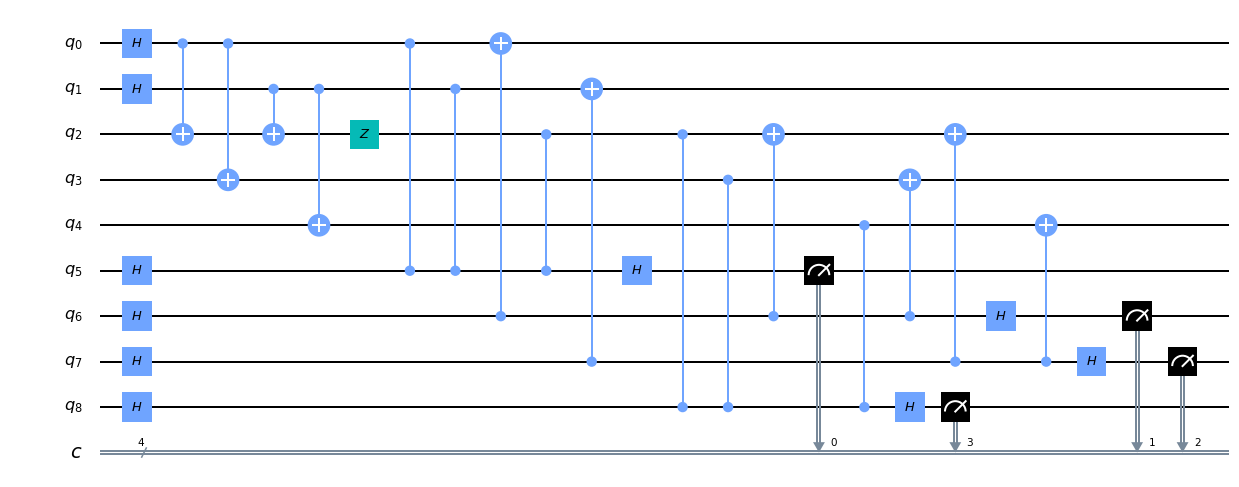

In [7]:
qc = QuantumCircuit(9,4)

# Make stabilizer state
qc.h(0)
qc.cx(0, 2)
qc.cx(0, 3)

qc.h(1)
qc.cx(1, 2)
qc.cx(1, 4)

# Simulate Z error
qc.z(2)

# Z-type Stabilizers
qc.h(5)
qc.cz(5, 0)
qc.cz(5, 1)
qc.cz(5, 2)
qc.h(5)

qc.h(8)
qc.cz(8, 2)
qc.cz(8, 3)
qc.cz(8, 4)
qc.h(8)

# X-type Stabilizers
qc.h(6)
qc.cx(6, 0)
qc.cx(6, 2)
qc.cx(6, 3)
qc.h(6)

qc.h(7)
qc.cx(7, 1)
qc.cx(7, 2)
qc.cx(7, 4)
qc.h(7)

# Measurement
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)
qc.draw()

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'0110': 1000}

## 平面型表面符号: 論理ビットの操作と測定

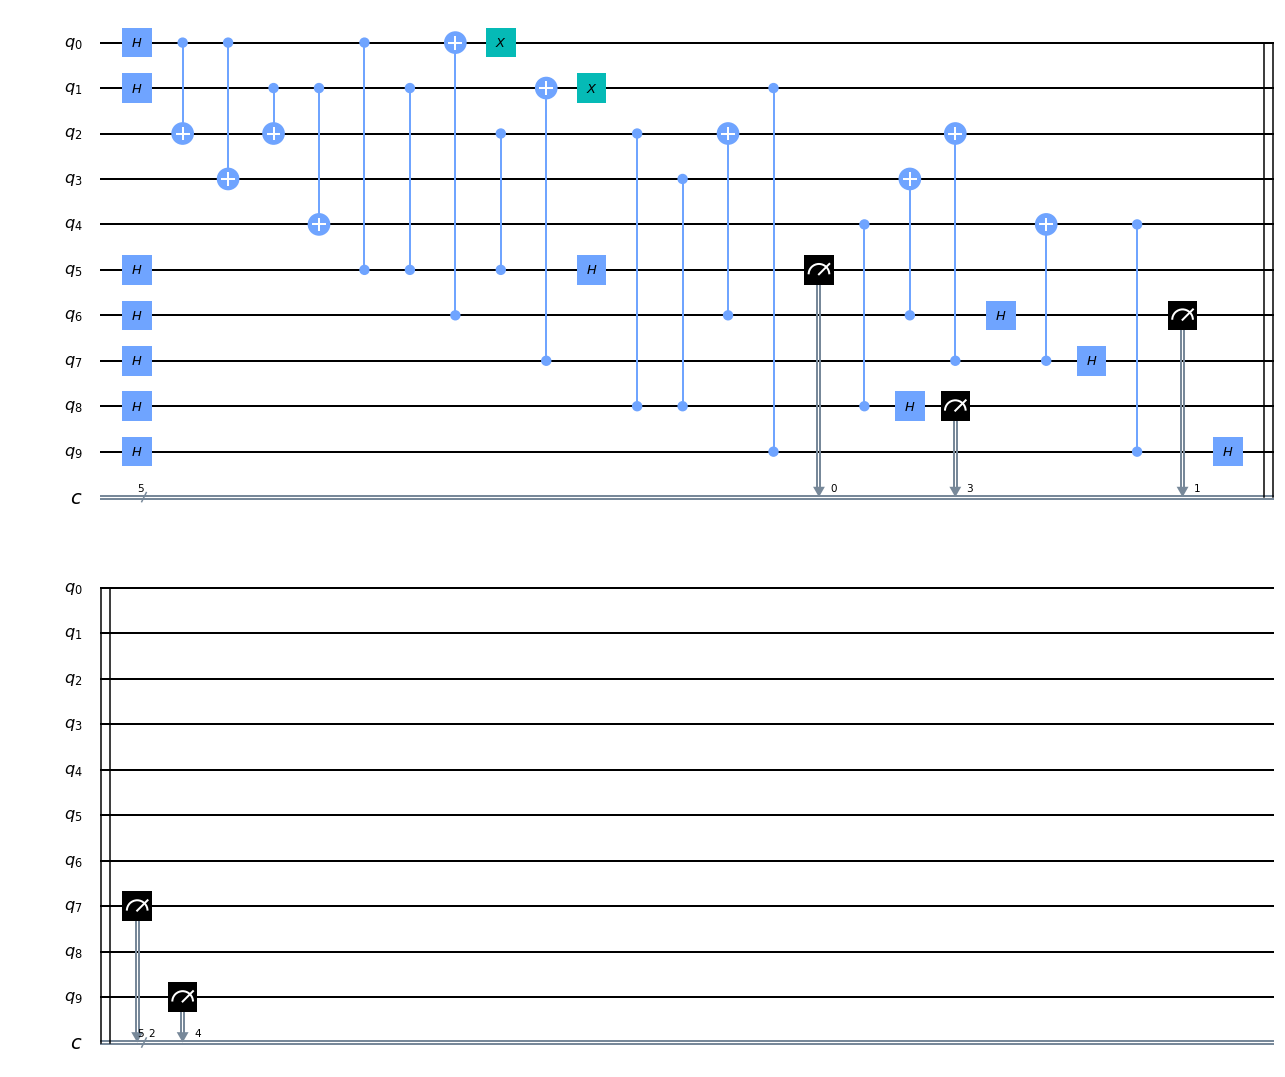

In [9]:
qc = QuantumCircuit(10,5)   # q_9 and c_5 bits for logical bit measurement

# Make Stabilizer State
qc.h(0)
qc.cx(0, 2)
qc.cx(0, 3)

qc.h(1)
qc.cx(1, 2)
qc.cx(1, 4)

# Z-type Stabilizers
qc.h(5)
qc.cz(5, 0)
qc.cz(5, 1)
qc.cz(5, 2)
qc.h(5)

qc.h(8)
qc.cz(8, 2)
qc.cz(8, 3)
qc.cz(8, 4)
qc.h(8)

# X-type Stabilizers
qc.h(6)
qc.cx(6, 0)
qc.cx(6, 2)
qc.cx(6, 3)
qc.h(6)

qc.h(7)
qc.cx(7, 1)
qc.cx(7, 2)
qc.cx(7, 4)
qc.h(7)

# logical pauli-X operator
qc.x(0)
qc.x(1)

# logical Z-basis hadamard test for the logical bit
qc.h(9)
qc.cz(9,1)
qc.cz(9,4)
qc.h(9)

# Measurement
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)
qc.measure(9, 4)
qc.draw()

In [10]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'10000': 1000}

## 最小構成のトーラス型表面符号

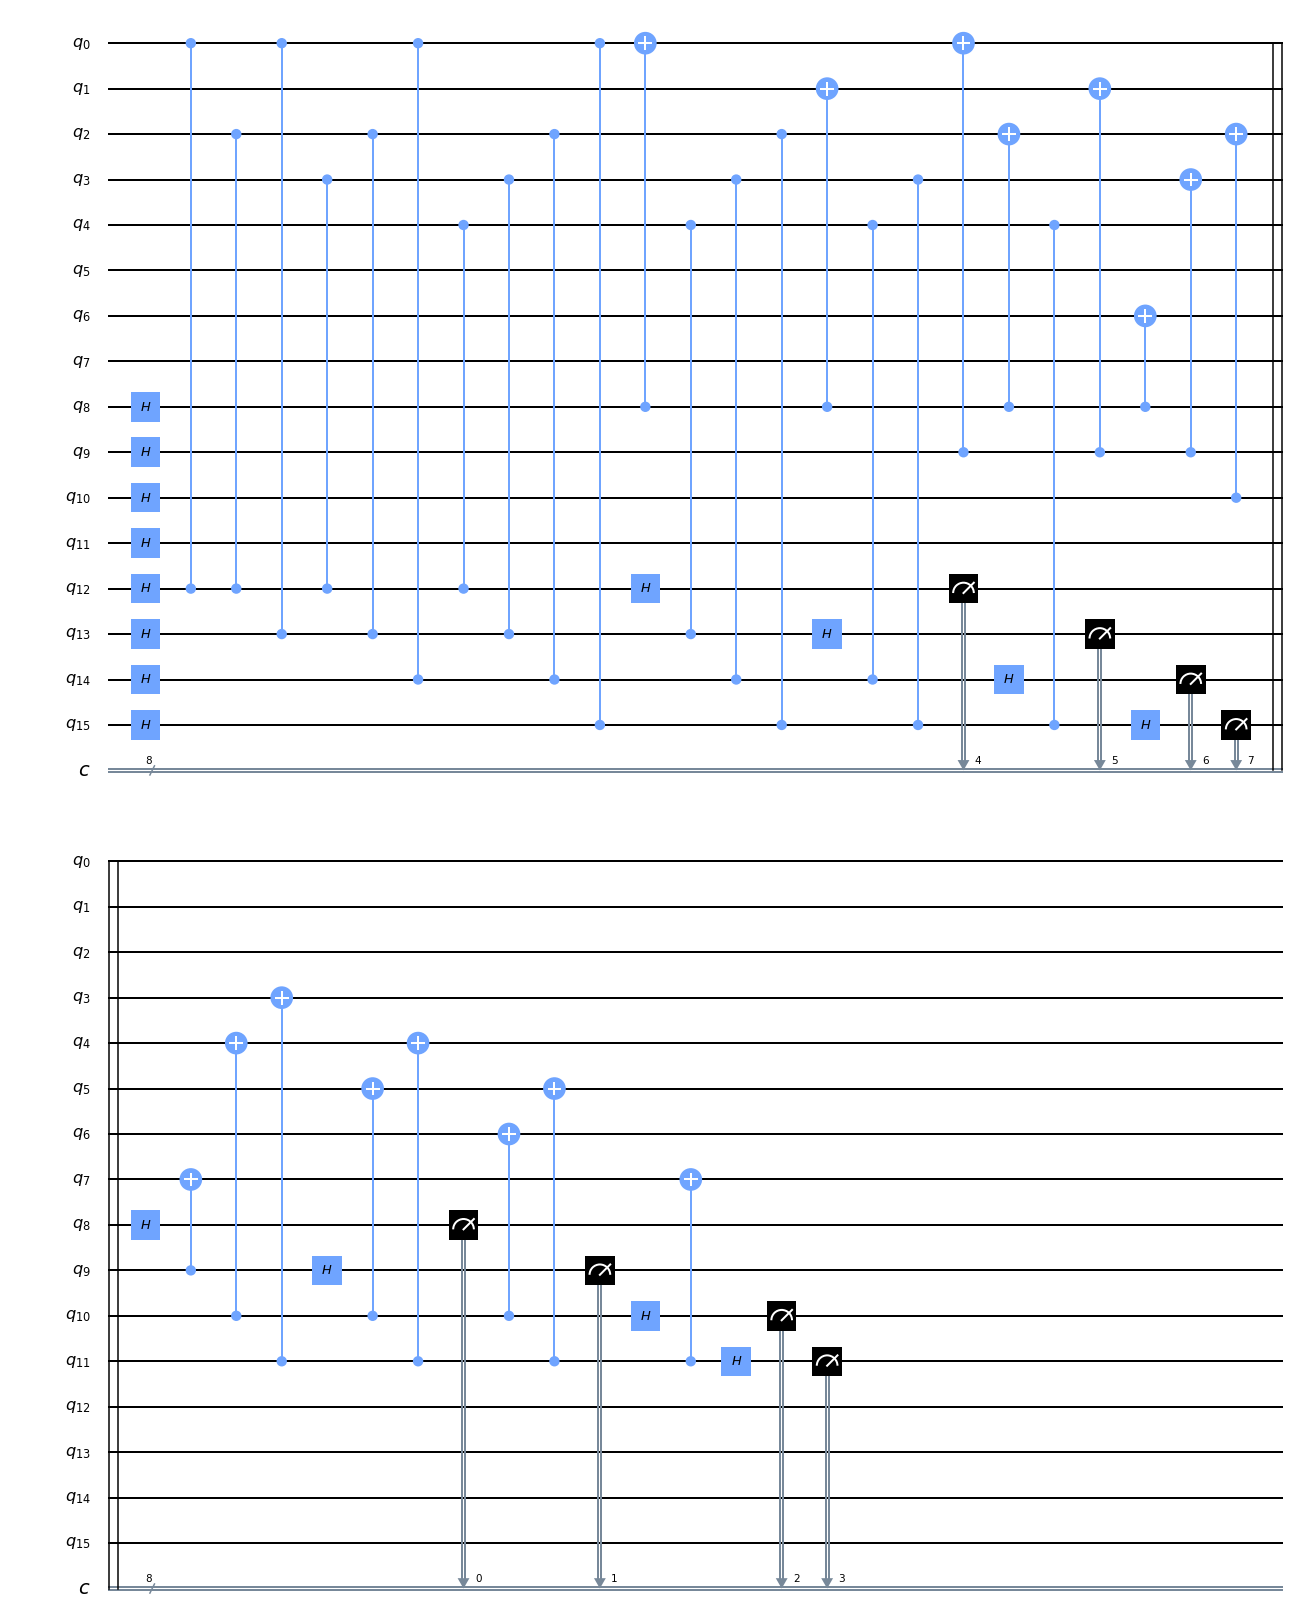

In [11]:
qc = QuantumCircuit(16,8)

# Z-type stabilizers
qc.h(12)
qc.cz(12, 0)
qc.cz(12, 2)
qc.cz(12, 3)
qc.cz(12, 4)
qc.h(12)

qc.h(13)
qc.cz(13, 0)
qc.cz(13, 2)
qc.cz(13, 3)
qc.cz(13, 4)
qc.h(13)

qc.h(14)
qc.cz(14, 0)
qc.cz(14, 2)
qc.cz(14, 3)
qc.cz(14, 4)
qc.h(14)

qc.h(15)
qc.cz(15, 0)
qc.cz(15, 2)
qc.cz(15, 3)
qc.cz(15, 4)
qc.h(15)

# X-type stabilizers
qc.h(8)
qc.cx(8, 0)
qc.cx(8, 1)
qc.cx(8, 2)
qc.cx(8, 6)
qc.h(8)

qc.h(9)
qc.cx(9, 0)
qc.cx(9, 1)
qc.cx(9, 3)
qc.cx(9, 7)
qc.h(9)

qc.h(10)
qc.cx(10, 2)
qc.cx(10, 4)
qc.cx(10, 5)
qc.cx(10, 6)
qc.h(10)

qc.h(11)
qc.cx(11, 3)
qc.cx(11, 4)
qc.cx(11, 5)
qc.cx(11, 7)
qc.h(11)


qc.measure(8, 0)
qc.measure(9, 1)
qc.measure(10, 2)
qc.measure(11, 3)
qc.measure(12, 4)
qc.measure(13, 5)
qc.measure(14, 6)
qc.measure(15, 7)
qc.draw()

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'00001001': 125,
 '00001111': 139,
 '00000101': 115,
 '00000000': 103,
 '00001010': 123,
 '00000110': 109,
 '00000011': 148,
 '00001100': 138}

## トーラス型表面符号 スタビライザー状態への初期化

In [13]:
qc = QuantumCircuit(16,8)

# Initialize to a stabilizers state
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 6)

qc.h(3)
qc.cx(3, 0)
qc.cx(3, 1)
qc.cx(3, 7)

qc.h(4)
qc.cx(4, 2)
qc.cx(4, 5)
qc.cx(4, 6)

# Z-type stabilizers
qc.h(12)
qc.cz(12, 0)
qc.cz(12, 2)
qc.cz(12, 3)
qc.cz(12, 4)
qc.h(12)

qc.h(13)
qc.cz(13, 0)
qc.cz(13, 2)
qc.cz(13, 3)
qc.cz(13, 4)
qc.h(13)

qc.h(14)
qc.cz(14, 0)
qc.cz(14, 2)
qc.cz(14, 3)
qc.cz(14, 4)
qc.h(14)

qc.h(15)
qc.cz(15, 0)
qc.cz(15, 2)
qc.cz(15, 3)
qc.cz(15, 4)
qc.h(15)

# X-type stabilizers
qc.h(8)
qc.cx(8, 0)
qc.cx(8, 1)
qc.cx(8, 2)
qc.cx(8, 6)
qc.h(8)

qc.h(9)
qc.cx(9, 0)
qc.cx(9, 1)
qc.cx(9, 3)
qc.cx(9, 7)
qc.h(9)

qc.h(10)
qc.cx(10, 2)
qc.cx(10, 4)
qc.cx(10, 5)
qc.cx(10, 6)
qc.h(10)

qc.h(11)
qc.cx(11, 3)
qc.cx(11, 4)
qc.cx(11, 5)
qc.cx(11, 7)
qc.h(11)


qc.measure(8, 0)
qc.measure(9, 1)
qc.measure(10, 2)
qc.measure(11, 3)
qc.measure(12, 4)
qc.measure(13, 5)
qc.measure(14, 6)
qc.measure(15, 7)
#qc.draw()

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'00000000': 1000}

## トーラス型表面符号 エラーのシミュレーション

In [15]:
qc = QuantumCircuit(16,8)

# Initialize to a stabilizers state
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 6)

qc.h(3)
qc.cx(3, 0)
qc.cx(3, 1)
qc.cx(3, 7)

qc.h(4)
qc.cx(4, 2)
qc.cx(4, 5)
qc.cx(4, 6)

# A simulated error
qc.z(0)

# Z-type stabilizers
qc.h(12)
qc.cz(12, 0)
qc.cz(12, 2)
qc.cz(12, 3)
qc.cz(12, 4)
qc.h(12)

qc.h(13)
qc.cz(13, 0)
qc.cz(13, 2)
qc.cz(13, 3)
qc.cz(13, 4)
qc.h(13)

qc.h(14)
qc.cz(14, 0)
qc.cz(14, 2)
qc.cz(14, 3)
qc.cz(14, 4)
qc.h(14)

qc.h(15)
qc.cz(15, 0)
qc.cz(15, 2)
qc.cz(15, 3)
qc.cz(15, 4)
qc.h(15)

# X-type stabilizers
qc.h(8)
qc.cx(8, 0)
qc.cx(8, 1)
qc.cx(8, 2)
qc.cx(8, 6)
qc.h(8)

qc.h(9)
qc.cx(9, 0)
qc.cx(9, 1)
qc.cx(9, 3)
qc.cx(9, 7)
qc.h(9)

qc.h(10)
qc.cx(10, 2)
qc.cx(10, 4)
qc.cx(10, 5)
qc.cx(10, 6)
qc.h(10)

qc.h(11)
qc.cx(11, 3)
qc.cx(11, 4)
qc.cx(11, 5)
qc.cx(11, 7)
qc.h(11)


qc.measure(8, 0)
qc.measure(9, 1)
qc.measure(10, 2)
qc.measure(11, 3)
qc.measure(12, 4)
qc.measure(13, 5)
qc.measure(14, 6)
qc.measure(15, 7)
#qc.draw()

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job.result().get_counts(qc)

{'00000011': 1000}